### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,id,Unnamed: 0.1,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,7319,37,2015-04-12,1.06,5636644.51,2848184.00,1988818.23,185198.77,614443.51,532714.02,79865.30,1864.19,conventional,2015,California
1,8410,10,2017-10-22,1.26,269443.25,159833.64,24349.84,1576.11,83683.66,73112.43,10571.23,0.00,conventional,2017,NewOrleansMobile
2,2732,12,2017-10-08,1.65,24397166.19,8911144.20,7609509.90,391832.89,7484679.20,5444021.28,1976738.84,63919.08,conventional,2017,TotalUS
3,17161,21,2017-08-06,1.34,476535.85,191792.73,140575.29,21769.92,122397.91,113356.35,6642.56,2399.00,conventional,2017,SanDiego
4,6249,21,2017-08-06,1.43,1762012.56,675558.34,580796.32,7231.22,498426.68,440097.50,44108.31,14220.87,conventional,2017,Plains


In [4]:
test.head()

,id,Unnamed: 0.1,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2,27,2016-06-19,13092.10,5180.03,6593.84,0.00,1318.23,563.36,754.87,0.0,organic,2016,LasVegas
1,3,49,2015-01-18,367047.36,83097.77,238956.51,5672.46,39320.62,39320.62,0.00,0.0,conventional,2015,Sacramento
2,7,28,2016-06-12,16462.75,2079.57,5830.96,0.00,8552.22,894.77,7657.45,0.0,organic,2016,Atlanta
3,8,28,2017-06-18,149975.22,38471.13,9716.75,0.00,101787.34,94445.95,7341.39,0.0,organic,2017,SouthCentral
4,17,44,2015-02-22,7176.69,651.55,5368.11,0.00,1157.03,340.00,817.03,0.0,organic,2015,Detroit


In [5]:
train.isna().sum()

id              0
Unnamed: 0.1    0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
test.isna().sum()

id              0
Unnamed: 0.1    0
Date            0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### Extracting Info for data types

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12774 entries, 0 to 12773
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            12774 non-null  int64  
 1   Unnamed: 0.1  12774 non-null  int64  
 2   Date          12774 non-null  object 
 3   AveragePrice  12774 non-null  float64
 4   Total Volume  12774 non-null  float64
 5   4046          12774 non-null  float64
 6   4225          12774 non-null  float64
 7   4770          12774 non-null  float64
 8   Total Bags    12774 non-null  float64
 9   Small Bags    12774 non-null  float64
 10  Large Bags    12774 non-null  float64
 11  XLarge Bags   12774 non-null  float64
 12  type          12774 non-null  object 
 13  year          12774 non-null  int64  
 14  region        12774 non-null  object 
dtypes: float64(9), int64(3), object(3)
memory usage: 1.5+ MB


In [8]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
train['type'] = label.fit_transform(train['type'])
train['region'] = label.fit_transform(train['region'])
test['type'] = label.fit_transform(test['type'])
test['region'] = label.fit_transform(test['region'])

### Get month from 'Date' and drop the column.

In [9]:
train['Month'] = pd.to_datetime(train['Date']).dt.month
train.drop('Date', axis=1, inplace=True)
test['Month'] = pd.to_datetime(test['Date']).dt.month
test.drop('Date', axis=1, inplace=True)

### Dropping id as it is unique 

In [10]:
train=train.drop(['id'],axis=1)
test=test.drop(['id'],axis=1)

### Correlation

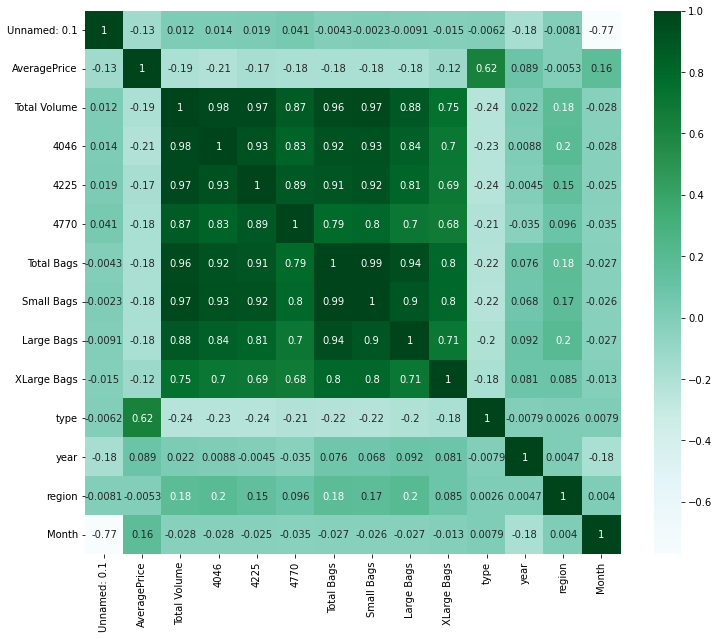

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(),annot=True,cmap='BuGn')
plt.show()

In [12]:
train=train.drop(['4046'],axis=1)
test=test.drop(['4046'],axis=1)
# train=train.drop(['4770'],axis=1)
# test=test.drop(['4770'],axis=1)
# train=train.drop(['4225'],axis=1)
# test=test.drop(['4225'],axis=1)
# train=train.drop(['Unnamed: 0.1'],axis=1)
# test=test.drop(['Unnamed: 0.1'],axis=1)
train=train.drop(['Total Volume'],axis=1)
test=test.drop(['Total Volume'],axis=1)
# train=train.drop(['Total Bags'],axis=1)
# test=test.drop(['Total Bags'],axis=1)
# train=train.drop(['Small Bags'],axis=1)
# test=test.drop(['Small Bags'],axis=1)
# train=train.drop(['Large Bags'],axis=1)
# test=test.drop(['Large Bags'],axis=1)
# train=train.drop(['XLarge Bags'],axis=1)
# test=test.drop(['XLarge Bags'],axis=1)
# train=train.drop(['region'],axis=1)
# test=test.drop(['region'],axis=1)
# train=train.drop(['type'],axis=1)
# test=test.drop(['type'],axis=1)

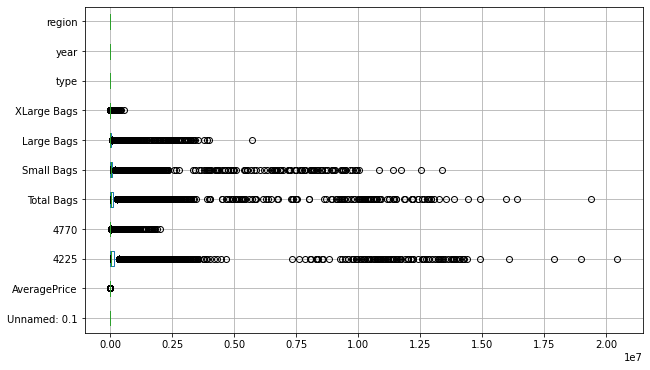

In [13]:
plt.figure(figsize=(10,6))
train.iloc[:,:-1].boxplot(vert=0)

In [14]:
for col in train.columns:
    Q1 = np.percentile(train[col], 25, interpolation = 'midpoint')
    #Q2 = np.percentile(df['fixed acidity'], 50, interpolation = 'midpoint')  
    Q3 = np.percentile(train[col], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    low_value = Q1 - 1.5 * IQR
    high_value = Q3 + 1.5 * IQR
    train[col] =np.where(train[col] >high_value, high_value, train[col])
    train[col] =np.where(train[col] <low_value, low_value, train[col])

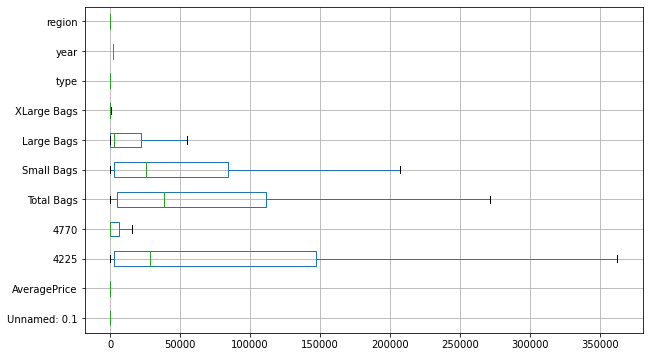

In [15]:
plt.figure(figsize=(10,6))
train.iloc[:,:-1].boxplot(vert=0)

### Training and Testing 

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = train.drop('AveragePrice', axis=1)
y = train['AveragePrice']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [17]:
from sklearn.model_selection import GridSearchCV

models = []
scores = []

In [18]:
param_grid = {'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9]}
model = XGBRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
gb_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(gb_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Gradient Boost')
scores.append(gb_score)

[06:41:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:41:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:41:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:41:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:41:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:41:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:41:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:41:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [19]:
# model = LinearRegression()
# model = RandomForestRegressor()
# model = DecisionTreeRegressor()
# model = GradientBoostingRegressor()
# model = XGBRegressor()
model.fit(X_train, y_train)

[06:42:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [20]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [21]:
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.7660
Test Score : 0.7458


In [22]:
y_test

8073     2.320
8548     0.920
8089     1.040
11188    1.500
8230     2.525
         ...  
800      1.000
5369     1.630
4036     1.630
5644     2.350
11539    1.350
Name: AveragePrice, Length: 2555, dtype: float64

In [23]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, test_pred)

0.15704279569730367

In [24]:
sub = pd.read_csv('test.csv')
sub.head()

,id,Unnamed: 0.1,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2,27,2016-06-19,13092.10,5180.03,6593.84,0.00,1318.23,563.36,754.87,0.0,organic,2016,LasVegas
1,3,49,2015-01-18,367047.36,83097.77,238956.51,5672.46,39320.62,39320.62,0.00,0.0,conventional,2015,Sacramento
2,7,28,2016-06-12,16462.75,2079.57,5830.96,0.00,8552.22,894.77,7657.45,0.0,organic,2016,Atlanta
3,8,28,2017-06-18,149975.22,38471.13,9716.75,0.00,101787.34,94445.95,7341.39,0.0,organic,2017,SouthCentral
4,17,44,2015-02-22,7176.69,651.55,5368.11,0.00,1157.03,340.00,817.03,0.0,organic,2015,Detroit


In [25]:
sub_preds= model.predict(test.values)
sub['AveragePrice'] = sub_preds
sub=sub.iloc[:, [0, -1]]
sub

,id,AveragePrice
0,2,1.355559
1,3,1.515056
2,7,1.463439
3,8,1.355559
4,17,1.355559
...,...,...
5470,18239,1.355559
5471,18244,1.355559
5472,18246,1.311563
5473,18247,1.311563


In [26]:
sub.to_csv('submission.csv', index=False)